<a href="https://colab.research.google.com/github/OrlovArtur/Test/blob/main/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Читаем файлы

In [1]:
! gdown --id 11NIpw-ArcK-LHFENlai05GFL7H2ESTVv

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11NIpw-ArcK-LHFENlai05GFL7H2ESTVv
To: /content/train.csv
100% 16.8k/16.8k [00:00<00:00, 14.2MB/s]


In [2]:
! gdown --id 1HZgd7hwsfs6ZE6CZQl_GKiO-kWuHaSbq

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HZgd7hwsfs6ZE6CZQl_GKiO-kWuHaSbq
To: /content/test.csv
100% 795/795 [00:00<00:00, 696kB/s]


In [3]:
! gdown --id 1NNd5-H9uR_ENk_OQYtTQXoCMjwUgHl_l

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NNd5-H9uR_ENk_OQYtTQXoCMjwUgHl_l
To: /content/players_feats.csv
100% 842k/842k [00:00<00:00, 80.7MB/s]


In [4]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
players_feats = pd.read_csv('/content/players_feats.csv')

# Мерджим train с players_feats

In [5]:
#Создаем копию players_feats в которй переименован team_id team1_id
t1 = players_feats.rename({'team_id': 'team1_id'},axis=1)

In [6]:
#Мерджим train с t1
df1 = train.merge(t1,how='left',on=['map_id','team1_id'])

In [7]:
#Создаем копию players_feats в которй переименован team_id на team2_id
t2 = players_feats.rename({'team_id': 'team2_id'},axis=1)

In [8]:
#Мерджим df1 с t2 и получаем полный датафрейм df_full с которым будем работать далее
df_full = df1.merge(t2,how='left',on=['map_id','team2_id'])

Удаляю лишние столбцы с названием карт, которые продублировались после мерджей, оставляю только один

In [9]:
#удаляем столбцы
df_full= df_full.drop(['map_name','map_name_y'], axis=1)

In [10]:
#переименовываем оставшийся столбец для удобтва
df_full = df_full.rename({'map_name_x': 'map_name'},axis=1)

Смотрим где есть пропуски данных и заполняем их значениями

In [11]:
#смотрим по каким столбцам есть NaN
df_full.isna().mean()[df_full.isna().mean()> 0]

p1_team_win_percent_after_first_kill_x    0.001403
p2_team_win_percent_after_first_kill_x    0.001403
p3_team_win_percent_after_first_kill_x    0.002805
p4_team_win_percent_after_first_kill_x    0.002805
p5_team_win_percent_after_first_kill_x    0.001403
p1_team_win_percent_after_first_kill_y    0.002805
p2_team_win_percent_after_first_kill_y    0.002805
p3_team_win_percent_after_first_kill_y    0.002805
p4_team_win_percent_after_first_kill_y    0.002805
p5_team_win_percent_after_first_kill_y    0.004208
dtype: float64

In [12]:
#заменяем наши пропуски данных(NaN) на 0
df_full[['p1_team_win_percent_after_first_kill_x',
             'p2_team_win_percent_after_first_kill_x',
             'p3_team_win_percent_after_first_kill_x',
             'p4_team_win_percent_after_first_kill_x',
             'p5_team_win_percent_after_first_kill_x',
             'p1_team_win_percent_after_first_kill_y',
             'p2_team_win_percent_after_first_kill_y',
             'p3_team_win_percent_after_first_kill_y',
             'p4_team_win_percent_after_first_kill_y',
             'p5_team_win_percent_after_first_kill_y']] = df_full[['p1_team_win_percent_after_first_kill_x',
                                                                  'p2_team_win_percent_after_first_kill_x',
                                                                  'p3_team_win_percent_after_first_kill_x',
                                                                  'p4_team_win_percent_after_first_kill_x',
                                                                  'p5_team_win_percent_after_first_kill_x',
                                                                  'p1_team_win_percent_after_first_kill_y',
                                                                  'p2_team_win_percent_after_first_kill_y',
                                                                  'p3_team_win_percent_after_first_kill_y',
                                                                  'p4_team_win_percent_after_first_kill_y',
                                                                  'p5_team_win_percent_after_first_kill_y']].fillna(0)

In [13]:
#проверяем все ли получилось
df_full.isna().mean()[df_full.isna().mean()> 0]

Series([], dtype: float64)

# Готовим данные для обучения модели

Получили датасет, разбиваем его та тренировочную часть и валидацию

In [14]:
from sklearn.model_selection import train_test_split
df_full_train, df_full_val = train_test_split(df_full,train_size=0.8,random_state=69)

In [15]:
len(df_full_val)/len(df_full)

0.2005610098176718

In [16]:
len(df_full_train)/len(df_full)

0.7994389901823282

Задаем фичи для нашей модели

In [17]:
#Все столбцы будут фичами за искл таргета
X= list(df_full_train.drop('who_win', axis=1))
#задаем категориальную переменную
cat_features = ['map_name']
#задаем таргет
y = ['who_win']

# Запускаем модель

Устанавливаем Catboost и запускаем его

In [18]:
! pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
#задаем параметры
parameters = {'verbose':100,
              'cat_features': cat_features,
              'random_seed':69,
              'eval_metric':'AUC',
              'learning_rate': 0.00001}

In [20]:
#запускаем обучение
model = CatBoostClassifier(**parameters)
model.fit(df_full_train[X],df_full_train[y],eval_set=(df_full_val[X],df_full_val[y]))

0:	test: 0.5563774	best: 0.5563774 (0)	total: 150ms	remaining: 2m 30s
100:	test: 0.6621351	best: 0.6789284 (33)	total: 5.21s	remaining: 46.3s
200:	test: 0.6503399	best: 0.6789284 (33)	total: 9.37s	remaining: 37.3s
300:	test: 0.6493403	best: 0.6789284 (33)	total: 17.2s	remaining: 39.9s
400:	test: 0.6485406	best: 0.6789284 (33)	total: 26s	remaining: 38.9s
500:	test: 0.6415434	best: 0.6789284 (33)	total: 33.6s	remaining: 33.5s
600:	test: 0.6405438	best: 0.6789284 (33)	total: 37.6s	remaining: 25s
700:	test: 0.6363455	best: 0.6789284 (33)	total: 41.6s	remaining: 17.8s
800:	test: 0.6319472	best: 0.6789284 (33)	total: 45.7s	remaining: 11.3s
900:	test: 0.6341463	best: 0.6789284 (33)	total: 49.7s	remaining: 5.46s
999:	test: 0.6343463	best: 0.6789284 (33)	total: 53.7s	remaining: 0us

bestTest = 0.6789284286
bestIteration = 33

Shrink model to first 34 iterations.


# Обучимся на всех данных

In [21]:
#задаем параметры
parameters = {'verbose':100,
              'cat_features': cat_features,
              'random_seed':69,
              'eval_metric':'AUC',
              'learning_rate': 0.00001,
              'iterations': model.best_iteration_ + 1,}

In [22]:
#запускаем обучение
model = CatBoostClassifier(**parameters)
model.fit(df_full[X],df_full[y])

0:	total: 48.7ms	remaining: 1.61s
33:	total: 1.91s	remaining: 0us


Посмотрим на AUC для train

In [23]:
df_full['model_predict'] = model.predict(df_full[X])

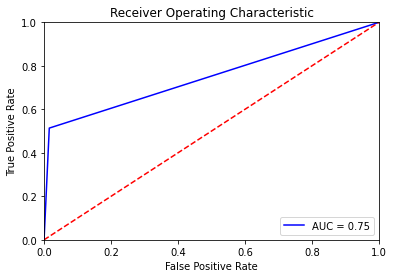

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(df_full['who_win'], df_full['model_predict'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Делаем предикт для test

Теперь нужно смерджить аналогично данные с test и сделать предикт для test

In [25]:
#Мерджим test с t1
test1 = test.merge(t1,how='left',on=['map_id','team1_id'])

In [26]:
#Мерджим test1 с t2 и получаем полный датафрейм test_full с которым будем работать далее
test_full = test1.merge(t2,how='left',on=['map_id','team2_id'])

Удаляю лишние столбцы с названием карт, которые продублировались после мерджей, оставляю только один

In [27]:
#удаляем столбцы
test_full= test_full.drop(['map_name','map_name_y'], axis=1)

In [28]:
#переименовываем оставшийся столбец для удобтва
test_full = test_full.rename({'map_name_x': 'map_name'},axis=1)

Смотрим где есть пропуски данных(если есть) и заполняем их значениями

In [29]:
#смотрим по каким столбцам есть NaN
test_full.isna().mean()[test_full.isna().mean()> 0]

Series([], dtype: float64)

Предикт для test

In [30]:
test_full['model_predict'] = model.predict(test_full[X])

Удаляем лишние столбцы для наглядности результата

In [31]:
test_full= test_full.drop(list(test_full.drop(['index','map_id','team1_id','team2_id','map_name','model_predict'], axis=1)), axis=1)

Выгружаем наш test в отдельный csv

In [32]:
test_full.to_csv (r'/content/Data_louna_test_predict/test_predict2.csv')

In [33]:
test_full

,index,map_id,team1_id,team2_id,map_name,model_predict
0,713,309,5973,5752,Dust2,0
1,714,541,5973,5752,Vertigo,0
2,715,1,8297,7020,Nuke,0
3,716,392,8297,7020,Mirage,0
4,717,684,8297,7020,Overpass,0
5,718,85,4494,4411,Vertigo,0
6,719,314,4494,4411,Inferno,0
7,720,403,4494,4411,Mirage,0
8,721,125,4608,7718,Inferno,1
9,722,241,4608,7718,Mirage,0
